In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
HistTrans=pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Historical-transaction-data.csv')
StoreInfo = pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Store-info.csv')
Test = pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Testing-data.csv')

In [3]:
df = HistTrans.copy()

In [4]:
HistTrans

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09T00:00:00.000Z,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02T00:00:00.000Z,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19T00:00:00.000Z,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03T00:00:00.000Z,NaN,MSBQ,SHOP077,440,3


In [5]:
col1_min = HistTrans['item_price'].min()
col1_max = HistTrans['item_price'].max()

col2_min = HistTrans['quantity_sold'].min()
col2_max = HistTrans['quantity_sold'].max()

In [6]:
col1_min,col1_max

(35, 17400)

In [7]:
col2_min,col2_max

(-1, 101)

In [8]:
HistTrans = HistTrans[HistTrans['quantity_sold'] > 0]

In [9]:
df = HistTrans.copy()

In [10]:
HistTrans.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

In [11]:
df1 = StoreInfo.copy()

In [12]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09T00:00:00.000Z,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02T00:00:00.000Z,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19T00:00:00.000Z,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03T00:00:00.000Z,NaN,MSBQ,SHOP077,440,3


In [13]:
HistTrans.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

### Create new Features

In [14]:
df['SALE_AMOUNT'] = df['item_price'] * df['quantity_sold']

In [15]:
df['transaction_date'] = df['transaction_date'].str.split('T', n=1, expand=True)[0]

In [16]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,SALE_AMOUNT
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220,2,440
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220,2,440
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160,2,320
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,150,2,300
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210,5,1050
...,...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,NaN,X21A,SHOP056,440,3,1320
473970,LEMONADE 1.5L,2021-12-02,NaN,LV2L,SHOP018,220,2,440
473971,FIT O ORANGE 200ML,2021-11-19,NaN,VC4O,SHOP077,210,4,840
473972,CREAM SODA 1.5L,2021-12-03,NaN,MSBQ,SHOP077,440,3,1320


In [17]:
# convert Date column to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# create new column Month with two-digit format
df['MONTH'] = df['transaction_date'].dt.strftime('%m')

In [18]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,SALE_AMOUNT,MONTH
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220,2,440,12
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220,2,440,10
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160,2,320,12
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,150,2,300,12
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210,5,1050,10
...,...,...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,NaN,X21A,SHOP056,440,3,1320,12
473970,LEMONADE 1.5L,2021-12-02,NaN,LV2L,SHOP018,220,2,440,12
473971,FIT O ORANGE 200ML,2021-11-19,NaN,VC4O,SHOP077,210,4,840,11
473972,CREAM SODA 1.5L,2021-12-03,NaN,MSBQ,SHOP077,440,3,1320,12


In [19]:
# fill NaN values with empty string
# df['item_description'] = df['item_description'].fillna('')


# create a new column 'BRAND' by splitting the ITEM string and taking the first element
df['BRAND'] = df['item_description'].str.split().str[:-1].str.join(' ')

# create a new column 'CAPACITY' by splitting the ITEM string and taking the last element
df['CAPACITY'] = df['item_description'].str.split().str[-1]

def process_value(val):
    if pd.notnull(val):  # ignore NaN values
        if 'ML' in val:
            val = val.replace('ML', '').strip()
            val = (float(val) / 1000)  
        elif 'L' in val:
            val = val.replace('L', '').strip()
            val = int(float(val))  # convert to int
    return val

# apply the function to the column
df['CAPACITY'] = df['CAPACITY'].apply(process_value)

In [20]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,SALE_AMOUNT,MONTH,BRAND,CAPACITY
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220,2,440,12,ORANGE BARLEY,1.00
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220,2,440,10,GINGER BEER,1.00
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160,2,320,12,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,150,2,300,12,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210,5,1050,10,STRAWBERRY MILK,0.18
...,...,...,...,...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,NaN,X21A,SHOP056,440,3,1320,12,NECTO,1.00
473970,LEMONADE 1.5L,2021-12-02,NaN,LV2L,SHOP018,220,2,440,12,LEMONADE,1.00
473971,FIT O ORANGE 200ML,2021-11-19,NaN,VC4O,SHOP077,210,4,840,11,FIT O ORANGE,0.20
473972,CREAM SODA 1.5L,2021-12-03,NaN,MSBQ,SHOP077,440,3,1320,12,CREAM SODA,1.00


In [21]:
df1

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low
...,...,...,...
119,SHOP087,527,NaN
120,SHOP050,411,NaN
121,SHOP061,699,NaN
122,SHOP056,597,NaN


In [22]:
df.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
SALE_AMOUNT             0
MONTH                   0
BRAND               35554
CAPACITY            35554
dtype: int64

In [23]:
df.columns

Index(['item_description', 'transaction_date', 'invoice_id', 'customer_id',
       'shop_id', 'item_price', 'quantity_sold', 'SALE_AMOUNT', 'MONTH',
       'BRAND', 'CAPACITY'],
      dtype='object')

### Check outliers

In [24]:
df.head(10)

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,SALE_AMOUNT,MONTH,BRAND,CAPACITY
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220,2,440,12,ORANGE BARLEY,1.00
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220,2,440,10,GINGER BEER,1.00
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160,2,320,12,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,150,2,300,12,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210,5,1050,10,STRAWBERRY MILK,0.18
5,CREAM SODA 1L,2021-10-30,1624.0,KZB3,SHOP055,150,2,300,10,CREAM SODA,1.00
6,CREAM SODA 1.5L,2021-10-28,2024.0,0PDI,SHOP112,220,2,440,10,CREAM SODA,1.00
7,TWISTEE APPLE 1L,2021-10-31,2521.0,7OPC,SHOP112,270,2,540,10,TWISTEE APPLE,1.00
8,FIT O MIXED FRUIT 200ML,2021-11-04,3223.0,ETXL,SHOP112,60,2,120,11,FIT O MIXED FRUIT,0.20
9,SODA PET 1.5L,2021-11-08,3555.0,JSGV,SHOP055,160,2,320,11,SODA PET,1.00


In [25]:
grouped_brand = df.groupby(['BRAND','CAPACITY'])['quantity_sold'].sum()
grouped_brand

BRAND                   CAPACITY
BOTTLED DRINKING WATER  0.50         42803
                        1.00         18567
CHOCOLATE MILK          0.18           180
CREAM SODA              0.50         57540
                        1.00         78493
CREAM SODA APPLE POP    1.00         20326
DRY GINGER ALE PET      0.50         12103
FIT O MANGO             0.20         15093
                        1.00         10967
FIT O MIXED FRUIT       0.20         18514
                        1.00         11974
FIT O ORANGE            0.20         23441
                        1.00         26987
GINGER BEER             0.40          5901
                        0.50         20926
                        1.00        145052
GINGER BEER SUGAR FREE  0.50         11141
KIK COLA                1.00          4045
LEMONADE                0.50         10877
                        1.00         25667
LIME CRUSH JUICE        1.00           121
NECTO                   0.50          6355
                     

In [26]:
# group the items by their brand and capacity, and count the number of unique prices
grouped = df.groupby(["BRAND", "CAPACITY"])["item_price"].nunique()

# get the items with the same brand and capacity but different prices
diff_prices = grouped[grouped > 1]

# print the items with different prices
if not diff_prices.empty:
    print("The following items have the same brand and capacity but different prices:")
    # df[df[["BRAND", "CAPACITY"]].apply(tuple, axis=1).isin(diff_prices.index)]
    print(diff_prices)
else:
    print("All items with the same brand and capacity have the same price.")

The following items have the same brand and capacity but different prices:
BRAND                   CAPACITY
BOTTLED DRINKING WATER  0.50        54
                        1.00        25
CHOCOLATE MILK          0.18        13
CREAM SODA              0.50        15
                        1.00        24
CREAM SODA APPLE POP    1.00         7
DRY GINGER ALE PET      0.50        22
FIT O MANGO             0.20        42
                        1.00        17
FIT O MIXED FRUIT       0.20        49
                        1.00        17
FIT O ORANGE            0.20        52
                        1.00        18
GINGER BEER             0.40        17
                        0.50        16
                        1.00        20
GINGER BEER SUGAR FREE  0.50        15
KIK COLA                1.00        11
LEMONADE                0.50        14
                        1.00        22
NECTO                   0.50        13
                        1.00        19
ORANGE BARLEY           1.00      

In [27]:
grouped.shape

(32,)

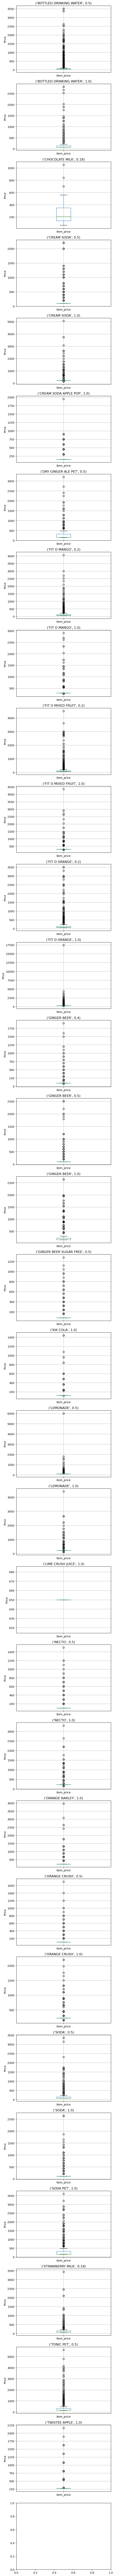

In [28]:
# group the items by their brand and capacity
grouped = df.groupby(["BRAND", "CAPACITY"])

# plot the price distribution for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(6, 4*len(grouped)))
for i, (name, group) in enumerate(grouped):
    group.boxplot(column="item_price", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Price")
plt.tight_layout()
plt.show()

In [29]:
diff_prices_df = pd.DataFrame(diff_prices).reset_index()
diff_prices_df.rename(columns={'item_price':'num_unique_prices'}, inplace=True)
diff_prices_df

,BRAND,CAPACITY,num_unique_prices
0,BOTTLED DRINKING WATER,0.50,54
1,BOTTLED DRINKING WATER,1.00,25
2,CHOCOLATE MILK,0.18,13
3,CREAM SODA,0.50,15
4,CREAM SODA,1.00,24
5,CREAM SODA APPLE POP,1.00,7
6,DRY GINGER ALE PET,0.50,22
7,FIT O MANGO,0.20,42
8,FIT O MANGO,1.00,17
9,FIT O MIXED FRUIT,0.20,49


In [30]:
# find outliers in the price distribution of each group brand, capacity group using IQR method and print the result
outlers_count = []

for name, group in grouped:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    # if not outliers.empty:
    #     print("{}:".format(name), end=" ")
    #     print(len(outliers))

    outlers_count.append((name[0], name[1], len(outliers),  round(len(outliers)/len(group) * 100, 2)))

In [31]:
outliers_df = pd.DataFrame(outlers_count, columns=["BRAND", "CAPACITY", "num_outliers", "outliers_percentage"])
outliers_df

,BRAND,CAPACITY,num_outliers,outliers_percentage
0,BOTTLED DRINKING WATER,0.50,1445,9.31
1,BOTTLED DRINKING WATER,1.00,495,5.47
2,CHOCOLATE MILK,0.18,3,7.50
3,CREAM SODA,0.50,4148,12.34
4,CREAM SODA,1.00,11416,26.88
5,CREAM SODA APPLE POP,1.00,1908,16.60
6,DRY GINGER ALE PET,0.50,303,5.22
7,FIT O MANGO,0.20,529,8.46
8,FIT O MANGO,1.00,1870,28.65
9,FIT O MIXED FRUIT,0.20,681,9.08


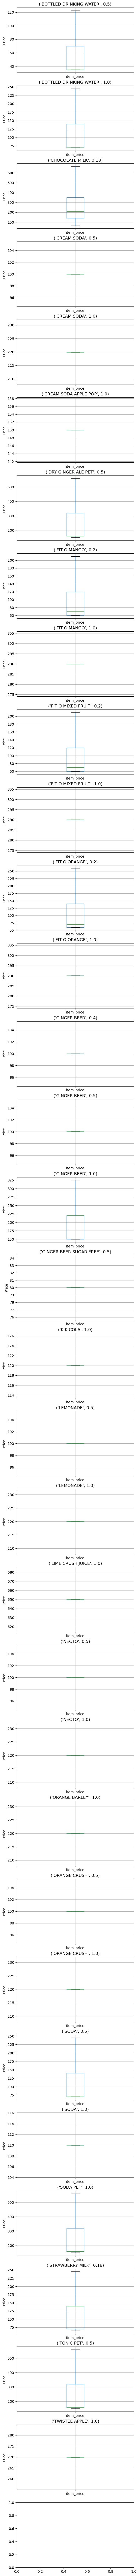

In [32]:
# fix outliers in the price distribution of each group brand, capacity group using IQR method
for name, group in grouped:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    if not outliers.empty:
        group["item_price"] = group["item_price"].clip(lower_bound, upper_bound)

    # copy the fixed group back to the original dataframe
    df.loc[group.index] = group

# plot the price distribution for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(6, 4*len(grouped)))
for i, (name, group) in enumerate(grouped):
    group.boxplot(column="item_price", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Price")

In [33]:
grouped2 = df.groupby(["BRAND", "CAPACITY"])
grouped2.describe()

invoice_id                              \
                                     count          mean           std   
BRAND                  CAPACITY                                          
BOTTLED DRINKING WATER 0.50        15440.0  2.038024e+06  1.434875e+06   
                       1.00         9008.0  2.026840e+06  1.362623e+06   
CHOCOLATE MILK         0.18           10.0  2.405770e+06  1.427706e+06   
CREAM SODA             0.50        33352.0  1.972514e+06  1.331955e+06   
                       1.00        41782.0  1.972640e+06  1.316884e+06   
CREAM SODA APPLE POP   1.00        11383.0  2.013399e+06  1.341374e+06   
DRY GINGER ALE PET     0.50         5760.0  2.012010e+06  1.359021e+06   
FIT O MANGO            0.20         6193.0  2.020434e+06  1.372094e+06   
                       1.00         6379.0  2.030507e+06  1.351603e+06   
FIT O MIXED FRUIT      0.20         7464.0  1.968259e+06  1.342822e+06   
                       1.00         6843.0  2.009405e+06  1.338955e+06   
FIT O ORANGE           0.20         9312.0  2.019541e+06  1.372950e+06   
                       1.00        14806.0  2.078448e+06  1.362224e+06   
GINGER BEER            0.40         3159.0  1.983919e+06  1.399283e+06   
                       0.50        11550.0  2.032572e+06  1.360420e+06   
                       1.00        82978.0  2.005399e+06  1.342184e+06   
GINGER BEER SUGAR FREE 0.50         5722.0  2.012336e+06  1.342356e+06   
KIK COLA               1.00         2345.0  1.973138e+06  1.301337e+06   
LEMONADE               0.50         6265.0  2.014562e+06  1.372084e+06   
                       1.00        15111.0  2.035730e+06  1.361883e+06   
LIME CRUSH JUICE       1.00           75.0  2.313899e+06  1.483927e+06   
NECTO                  0.50         3698.0  2.047677e+06  1.392383e+06   
                       1.00        22716.0  1.955879e+06  1.317732e+06   
ORANGE BARLEY          1.00        22489.0  1.933727e+06  1.295032e+06   
ORANGE CRUSH           0.50         4576.0  1.960680e+06  1.354260e+06   
                       1.00         9672.0  1.971145e+06  1.343625e+06   
SODA                   0.50        16408.0  2.003108e+06  1.337098e+06   
                       1.00        12781.0  1.993928e+06  1.317534e+06   
SODA PET               1.00        15308.0  2.002794e+06  1.337103e+06   
STRAWBERRY MILK        0.18         5314.0  2.001009e+06  1.332364e+06   
TONIC PET              0.50        12510.0  2.017574e+06  1.342342e+06   
TWISTEE APPLE          1.00         3826.0  2.005213e+06  1.338931e+06   

                                                                              \
                                      min         25%        50%         75%   
BRAND                  CAPACITY                                                
BOTTLED DRINKING WATER 0.50          27.0  1025530.50  2036318.5  3072273.00   
                       1.00         144.0  1043042.50  2061395.5  3060955.50   
CHOCOLATE MILK         0.18       11203.0  1259103.00  2507720.0  3752012.25   
CREAM SODA             0.50         200.0  1025858.00  2015927.0  3019887.00   
                       1.00          27.0  1036892.50  2027171.0  3025504.75   
CREAM SODA APPLE POP   1.00         144.0  1042874.00  2044010.0  3040622.50   
DRY GINGER ALE PET     0.50         241.0   928182.00  2043597.0  3052308.50   
FIT O MANGO            0.20         963.0  1028912.00  2053091.0  3032181.00   
                       1.00          97.0  1039775.50  2045349.0  3039773.00   
FIT O MIXED FRUIT      0.20         190.0  1024671.00  2015296.0  3012716.25   
                       1.00         276.0  1043220.50  2043989.0  3028684.00   
FIT O ORANGE           0.20         190.0  1032860.50  2037150.5  3048621.00   
                       1.00         129.0  1072260.25  2066358.5  3079927.25   
GINGER BEER            0.40        1988.0   918971.50  2003337.0  3021885.00   
                       0.50         316.0  1038372.00  2043956.0  3050734.00   
 

In [34]:
grouped2 = df.groupby(["BRAND", "CAPACITY"])

# find outliers in the price distribution of each group brand, capacity group using IQR method and print the result
outlers_count2 = []

for name, group in grouped2:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    # if not outliers.empty:
    #     print("{}:".format(name), end=" ")
    #     print(len(outliers))

    outlers_count2.append((name[0], name[1], len(outliers),  round(len(outliers)/len(group) * 100, 2)))

outliers_df2 = pd.DataFrame(outlers_count2, columns=["BRAND", "CAPACITY", "num_outliers", "outliers_percentage"])
outliers_df2

,BRAND,CAPACITY,num_outliers,outliers_percentage
0,BOTTLED DRINKING WATER,0.50,0,0.0
1,BOTTLED DRINKING WATER,1.00,0,0.0
2,CHOCOLATE MILK,0.18,0,0.0
3,CREAM SODA,0.50,0,0.0
4,CREAM SODA,1.00,0,0.0
5,CREAM SODA APPLE POP,1.00,0,0.0
6,DRY GINGER ALE PET,0.50,0,0.0
7,FIT O MANGO,0.20,0,0.0
8,FIT O MANGO,1.00,0,0.0
9,FIT O MIXED FRUIT,0.20,0,0.0


In [35]:
# # assume the DataFrame is called df
# for col in cols:
#     sns.boxplot(x=df1[col])
#     plt.show()

In [36]:
# df1.columns

In [37]:
# out_df = df1.drop(columns=["shop_id",'shop_profile'])

In [38]:
# # Seperate normally distributed columns and skewed columns based on Shapiro test and skewness
# from scipy.stats import shapiro, skew

# def get_skew_colsss(df):
#     p_values = [shapiro(df[col])[1] for col in df.columns]
#     skewness = [skew(df[col]) for col in df.columns]

#     normal_cols = [i for i, p in zip(df.columns,p_values) if p > 0.5]
#     skewed_cols = [i for i,s in zip(df.columns,skewness) if abs(s) > 0.5]

#     return normal_cols,skewed_cols

In [39]:
# # train data
# normal_cols, skewed_cols = get_skew_colsss(out_df)

In [40]:
# normal_cols

In [41]:
# skewed_cols

In [42]:
# # Function to handle outliers based on Inter Quartile Range method
# def outlier_handler_skewed(df,col,option):
#     # step 1: calculate IQR
#     Q1 = df[col].quantile(0.25)
#     Q3=df[col].quantile(0.75)
#     IQR = Q3-Q1

#     # step 2: calculate upper and lower bounds for each column 
#     lower = Q1 - 1.5*(IQR)
#     upper = Q3 + 1.5*(IQR)

    
#     if option=="drop":

#         df.drop(df.loc[df[col]<lower].index,inplace=True)

#         df.drop(df.loc[df[col]>upper].index,inplace=True)

#     elif option=="fill_Qrt":

#         df[col] = np.where(df[col] < lower, lower, df[col])

#         df[col] = np.where(df[col] > upper, upper, df[col])
        
    
#     elif option =="fill_mean":
#         df[col] = np.where(df[col] < lower, df[col].mean() , df[col])
#         df[col] = np.where(df[col] > upper, df[col].mean() , df[col])
        
#     elif option =="fill_median":
#         df[col] = np.where(df[col] < lower, df[col].median(), df[col])
#         df[col] = np.where(df[col] > upper, df[col].median(), df[col])  

In [43]:
# # handle outliers in train set
# for i in cols:
#     outlier_handler_skewed(df1_x,i,'fill_median')

In [44]:
# # handle outliers in train set
# for i in cols:
#     outlier_handler_skewed(df1_x,i,'fill_median')

### Create new features

In [45]:
sales_by_shop = df.groupby('shop_id')['SALE_AMOUNT'].sum().reset_index()
# sales_by_shop

In [46]:
df1 = df1.merge(sales_by_shop, how='left', on='shop_id')
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT
0,SHOP047,528,Moderate,842960
1,SHOP009,676,High,1970870
2,SHOP083,676,Low,1691985
3,SHOP117,676,Low,2326200
4,SHOP042,676,Low,1340215
...,...,...,...,...
119,SHOP087,527,NaN,1128935
120,SHOP050,411,NaN,2399125
121,SHOP061,699,NaN,2110800
122,SHOP056,597,NaN,3024315


In [47]:
df1['sale_amount_per_sqft'] = df1['SALE_AMOUNT'] / df1['shop_area_sq_ft']
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft
0,SHOP047,528,Moderate,842960,1596.515152
1,SHOP009,676,High,1970870,2915.488166
2,SHOP083,676,Low,1691985,2502.936391
3,SHOP117,676,Low,2326200,3441.124260
4,SHOP042,676,Low,1340215,1982.566568
...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651
120,SHOP050,411,NaN,2399125,5837.287105
121,SHOP061,699,NaN,2110800,3019.742489
122,SHOP056,597,NaN,3024315,5065.854271


In [48]:
customers_per_shop = HistTrans.groupby('shop_id')['customer_id'].nunique().reset_index(name='num_unique_customers')
customers_per_shop

,shop_id,num_unique_customers
0,SHOP001,1106
1,SHOP002,2546
2,SHOP003,2038
3,SHOP004,1724
4,SHOP005,2189
...,...,...
119,SHOP123,1146
120,SHOP124,2251
121,SHOP125,886
122,SHOP126,1742


In [49]:
df1 = df1.merge(customers_per_shop, how='left', on='shop_id')
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers
0,SHOP047,528,Moderate,842960,1596.515152,920
1,SHOP009,676,High,1970870,2915.488166,2476
2,SHOP083,676,Low,1691985,2502.936391,1876
3,SHOP117,676,Low,2326200,3441.124260,2015
4,SHOP042,676,Low,1340215,1982.566568,1826
...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061
120,SHOP050,411,NaN,2399125,5837.287105,1765
121,SHOP061,699,NaN,2110800,3019.742489,1725
122,SHOP056,597,NaN,3024315,5065.854271,2810


In [50]:
item_per_shop = HistTrans.groupby('shop_id')['item_description'].nunique().reset_index(name='num_unique_items')
item_per_shop

,shop_id,num_unique_items
0,SHOP001,35
1,SHOP002,35
2,SHOP003,35
3,SHOP004,35
4,SHOP005,36
...,...,...
119,SHOP123,36
120,SHOP124,35
121,SHOP125,36
122,SHOP126,31


In [51]:
num_transactions_per_shop = HistTrans.groupby('shop_id').size().reset_index(name='num_transactions')
num_transactions_per_shop

,shop_id,num_transactions
0,SHOP001,1980
1,SHOP002,4721
2,SHOP003,3597
3,SHOP004,3392
4,SHOP005,4138
...,...,...
119,SHOP123,2035
120,SHOP124,4366
121,SHOP125,1838
122,SHOP126,3141


In [52]:
df1 = df1.merge(num_transactions_per_shop, how='left', on='shop_id')
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_transactions
0,SHOP047,528,Moderate,842960,1596.515152,920,1662
1,SHOP009,676,High,1970870,2915.488166,2476,4517
2,SHOP083,676,Low,1691985,2502.936391,1876,3550
3,SHOP117,676,Low,2326200,3441.124260,2015,4015
4,SHOP042,676,Low,1340215,1982.566568,1826,3219
...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061,1991
120,SHOP050,411,NaN,2399125,5837.287105,1765,3875
121,SHOP061,699,NaN,2110800,3019.742489,1725,3072
122,SHOP056,597,NaN,3024315,5065.854271,2810,5663


In [53]:
df1['sales_per_customer'] = df1['SALE_AMOUNT']/df1['num_transactions']
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_transactions,sales_per_customer
0,SHOP047,528,Moderate,842960,1596.515152,920,1662,507.196149
1,SHOP009,676,High,1970870,2915.488166,2476,4517,436.322781
2,SHOP083,676,Low,1691985,2502.936391,1876,3550,476.615493
3,SHOP117,676,Low,2326200,3441.124260,2015,4015,579.377335
4,SHOP042,676,Low,1340215,1982.566568,1826,3219,416.345138
...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061,1991,567.019086
120,SHOP050,411,NaN,2399125,5837.287105,1765,3875,619.129032
121,SHOP061,699,NaN,2110800,3019.742489,1725,3072,687.109375
122,SHOP056,597,NaN,3024315,5065.854271,2810,5663,534.048208


### Check NaN values

In [54]:
len(df1['shop_id'].unique().tolist())

124

### Drop unwanted Features

In [55]:
df.drop(['item_description', 'transaction_date','invoice_id','customer_id'], axis=1, inplace=True)

In [56]:
df1.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile', 'SALE_AMOUNT',
       'sale_amount_per_sqft', 'num_unique_customers', 'num_transactions',
       'sales_per_customer'],
      dtype='object')

In [57]:
cols = ['shop_area_sq_ft','SALE_AMOUNT','sale_amount_per_sqft','num_unique_customers','num_transactions','sales_per_customer','num_unique_items']

### Divide Train and Test data

In [58]:
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_transactions,sales_per_customer
0,SHOP047,528,Moderate,842960,1596.515152,920,1662,507.196149
1,SHOP009,676,High,1970870,2915.488166,2476,4517,436.322781
2,SHOP083,676,Low,1691985,2502.936391,1876,3550,476.615493
3,SHOP117,676,Low,2326200,3441.124260,2015,4015,579.377335
4,SHOP042,676,Low,1340215,1982.566568,1826,3219,416.345138
...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061,1991,567.019086
120,SHOP050,411,NaN,2399125,5837.287105,1765,3875,619.129032
121,SHOP061,699,NaN,2110800,3019.742489,1725,3072,687.109375
122,SHOP056,597,NaN,3024315,5065.854271,2810,5663,534.048208


In [59]:
df_pred = df1[pd.isnull(df1['shop_profile'])]

In [60]:
df_pred

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_transactions,sales_per_customer
100,SHOP046,545,NaN,2607865,4785.073394,1713,3387,769.963094
101,SHOP024,676,NaN,1308795,1936.087278,1628,2839,461.005636
102,SHOP023,617,NaN,2570425,4166.004862,2206,4031,637.664351
103,SHOP097,310,NaN,2642380,8523.806452,1647,3098,852.930923
104,SHOP044,715,NaN,1310440,1832.783217,1533,2594,505.181187
105,SHOP030,530,NaN,2862995,5401.877358,1616,3558,804.664137
106,SHOP038,411,NaN,1444025,3513.442822,1755,3080,468.839286
107,SHOP029,597,NaN,1973805,3306.206030,2035,3740,527.755348
108,SHOP096,676,NaN,2600915,3847.507396,2469,4723,550.691298
109,SHOP092,617,NaN,1961240,3178.670989,2230,3848,509.677755


In [61]:
df2 = df1.dropna()

In [62]:
X = df2.drop(['shop_profile', 'shop_id'], axis=1)
y = df2['shop_profile']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_pred = df_pred.drop(['shop_profile', 'shop_id'], axis=1)

In [64]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score

# # Create a Random Forest Classifier with 100 trees
# rf = RandomForestClassifier(n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_depth=10, bootstrap=False)

In [65]:
# rf.fit(X_train, y_train)

In [66]:
# y_pred = rf.predict(X_test)

In [67]:
# f1 = f1_score(y_test, y_pred, average='macro')
# print("F1 score:", f1)

In [68]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.feature_selection import SelectKBest, mutual_info_classif

# poly = PolynomialFeatures(degree=3, include_bias=False)
# X_poly = poly.fit_transform(X)
# X_poly_pred = poly.transform(df_pred.drop(['shop_id', 'shop_profile'], axis=1))

# X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
# X_poly_pred_df = pd.DataFrame(X_poly_pred, columns=poly.get_feature_names_out(X.columns))

# # instantiate SelectKBest
# kbest = SelectKBest(score_func=mutual_info_classif, k=3)
# X_new = kbest.fit_transform(X_poly_df, y)
# X_new_pred = kbest.transform(X_poly_pred_df)

# # get selected feature names
# X_poly_df.columns[kbest.get_support()]

In [69]:
# X_new_df = pd.DataFrame(X_new, columns=X_poly_df.columns[kbest.get_support()])
# X_poly_pred_new_df = pd.DataFrame(X_new_pred, columns=X_poly_df.columns[kbest.get_support()])

In [70]:
# X_new_df

In [71]:
# X_new_df = X_new_df.merge(X, left_index=True, right_index=True)
# X_pred_new_df = X_poly_pred_new_df.merge(df_pred.drop(['shop_id', 'shop_profile'], axis=1).reset_index(), left_index=True, right_index=True)

In [72]:
# X_new_df

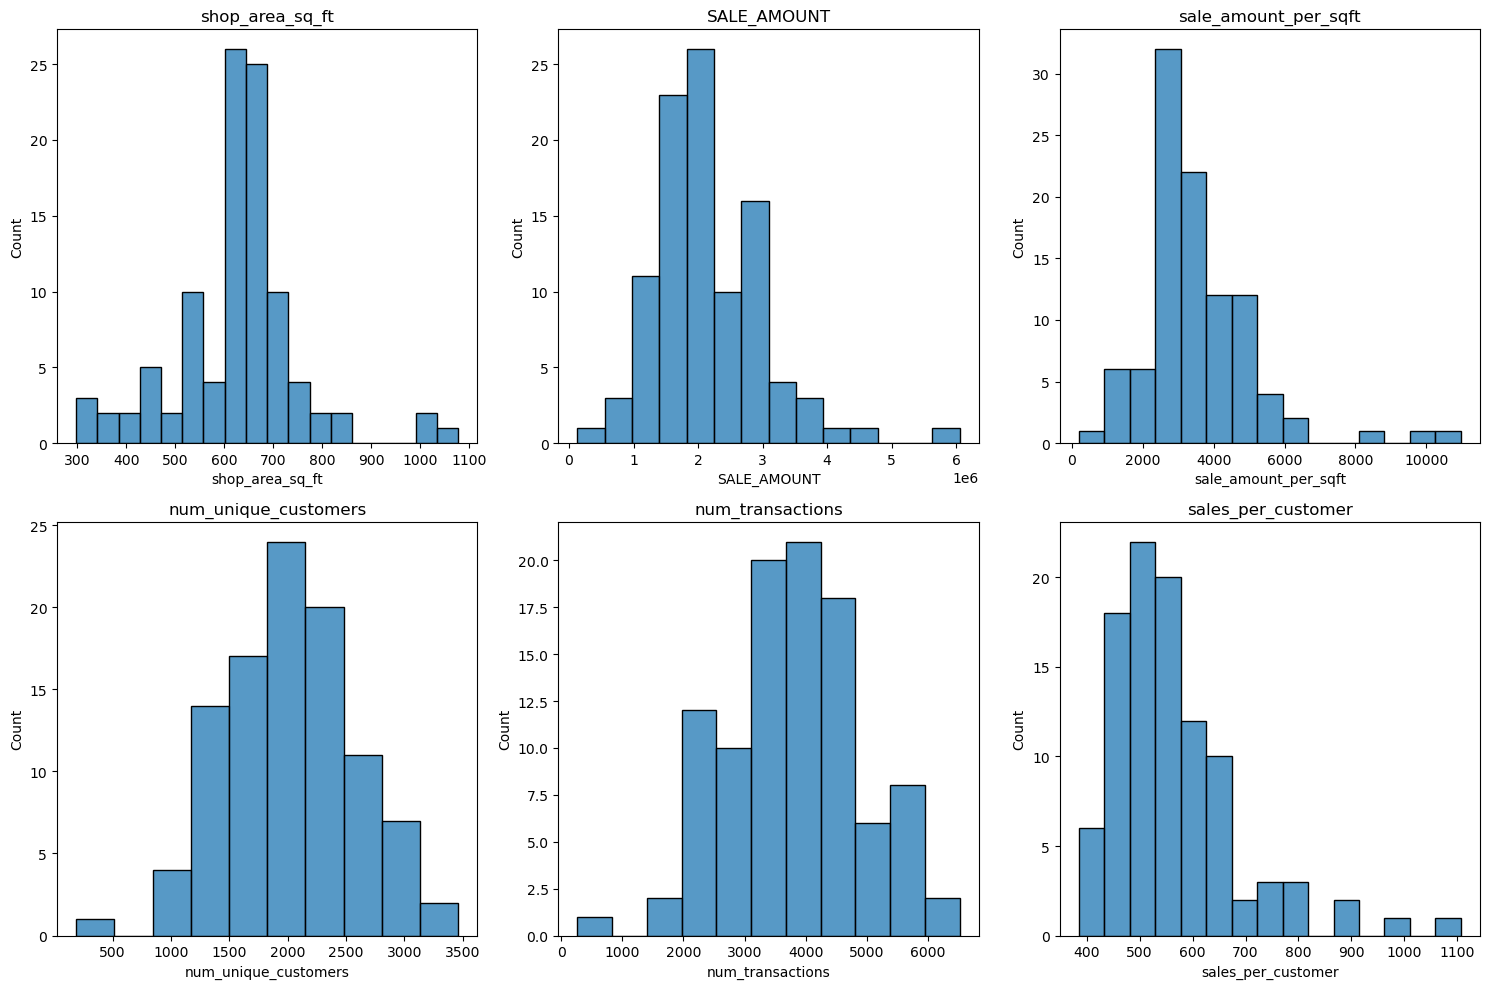

In [73]:
# feature distribution histplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Index(['SALE_AMOUNT', 'sale_amount_per_sqft', 'sales_per_customer'], dtype='object')


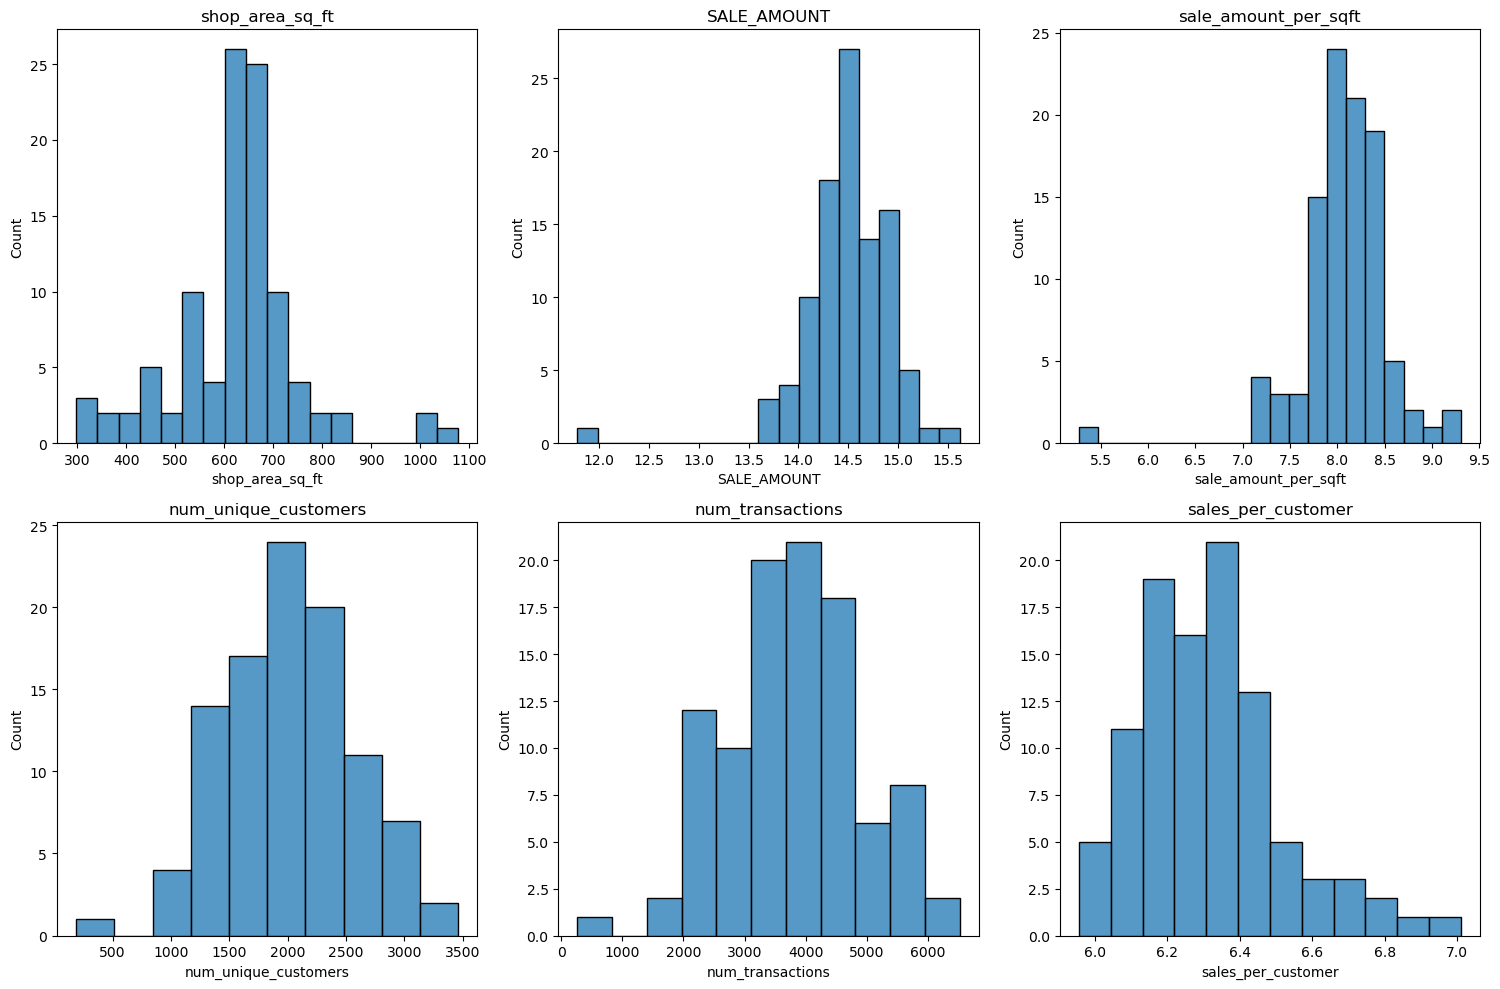

In [74]:
# skewness for each feature
skew = X.skew()

# log transform skewed features
skewed_features = skew[abs(skew) > 0.5].index
print(skewed_features)
X[skewed_features] = np.log1p(X[skewed_features])

X_pred[skewed_features] = np.log1p(X_pred[skewed_features])

# feature distribution histplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [75]:
# scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pred_scaled = scaler.transform(X_pred)

In [76]:
# pair plot for selected features
# sns.pairplot(X_new_df.merge(y, left_index=True, right_index=True), hue='shop_profile')

In [77]:
# show difference of the features in the two dataframes (X_new_df and X_pred_new_df)
# set(X_new_df.columns) - set(X_pred_new_df.columns)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [106]:
# hyperparameter tuning for random forest using RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_scaled, y)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'bootstrap': True}

In [107]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_depth=10, bootstrap=True)

In [94]:
# rf.fit(X_new_df, y)

In [95]:
# y_pred = rf.predict(X_poly_pred_new_df)

In [108]:
rf.fit(X_scaled, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)

In [116]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_scaled, y)

y_pred2 = logreg.predict(X_pred_scaled)
y_pred2

array(['Moderate', 'Low', 'High', 'Moderate', 'Low', 'Moderate', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'Moderate', 'High',
       'Moderate', 'Low', 'Moderate', 'High', 'Low', 'Moderate',
       'Moderate', 'Moderate', 'High', 'Low'], dtype=object)

In [109]:
y_pred = rf.predict(X_pred_scaled)

In [110]:
y_pred

array(['High', 'Low', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Low', 'Low', 'High', 'Low', 'High', 'Moderate', 'Low', 'High',
       'High', 'Low', 'Moderate', 'High', 'Low', 'Moderate', 'Moderate',
       'High', 'High', 'Low'], dtype=object)

In [99]:
# f1 = f1_score(y_test, y_pred, average='macro')
# print("F1 score:", f1)

In [117]:
new_pred_df = pd.DataFrame(y_pred2, columns=['shop_profile'])
# new_pred_df = pd.DataFrame(df_pred['shop_id']).merge(new_pred_df, left_index=True, right_index=True)
# new_pred_df
# df_pred['shop_id']
new_pred_df = pd.concat([pd.DataFrame(df_pred['shop_id']).reset_index(), new_pred_df], axis=1)
new_pred_df.drop(['index'], axis=1, inplace=True)

In [118]:
new_pred_df

,shop_id,shop_profile
0,SHOP046,Moderate
1,SHOP024,Low
2,SHOP023,High
3,SHOP097,Moderate
4,SHOP044,Low
5,SHOP030,Moderate
6,SHOP038,Low
7,SHOP029,Low
8,SHOP096,High
9,SHOP092,Low


In [119]:
Test.drop(['shop_profile'], axis=1, inplace=True)

In [120]:
Test = pd.merge(Test, new_pred_df, on='shop_id', how='left')
Test

,shop_id,shop_profile
0,SHOP046,Moderate
1,SHOP024,Low
2,SHOP023,High
3,SHOP097,Moderate
4,SHOP044,Low
5,SHOP030,Moderate
6,SHOP038,Low
7,SHOP029,Low
8,SHOP096,High
9,SHOP092,Low


In [121]:
Test.to_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Testing-data3-logistic.csv', index=False)